# Sensitivity testing to asssess how different weights on factors will affect final result

In [9]:
# load up dependencies and local functions
%run functions.py

# relative paths
homedir = os.getcwd()
if not os.path.exists(os.path.join(homedir,'tempspace')): os.makedirs(os.path.join(homedir,'tempspace'))  
tempspace = os.path.join(homedir, "tempspace")
intermidiate_DataFramesPath = os.path.join(".", 'Outputs/intermidiate_DataFrames')

In [10]:
# Read in Data from HI_Cesspool_Prioritization_Update_2021
DECAY_PRIORITY_MASTER = pd.read_csv(os.path.join(tempspace, "DECAY_PRIORITY_MASTER.csv"))

baseCols = ['X', 'Y', 'Island', 'TMK', 'Uid', 'In_2017_CP_zone',
             'BlockBk_ID', 'BlockGp_ID', 'Track_ID', 'Flikr_ID'] # 'PepPerHos',

# Read in initial thresholds off of csv
thresholds =   pd.read_csv(os.path.join("..", "Projected_data", 'Thresholds_and_Weights_v6.csv'), index_col=0)
numcols=['W1_base', 'W2_eco', 'W3_anthro', 'T1', 'T2', 'T3']
thresholds[numcols] = thresholds[numcols].apply(pd.to_numeric, errors='coerce', axis=1)

# Identify variables to consider and rank
Rank_Cols = ['Soil_Suitability_Rank',  'SLR_Rank', 'WELLCZ_Rank', 'dist2_coast_m_Rank', 
             'dist2_Strm_Wtlnd_m_Rank', 'rainfall_in_Rank', 'dist2_MunWells_m_Rank', 
             'dist2_DomWells_m_Rank', 'Dep_to_Water_m_Rank', 'OSDS_Density_perAcre_Rank',
             'Swim_beach_Rank', 'UserDays_Rank', 'Fish_Rank', 'Coral_Rank', 'Wave_pwr_Rank']  # , 'PepPerHos_Rank'

## Base Scenario

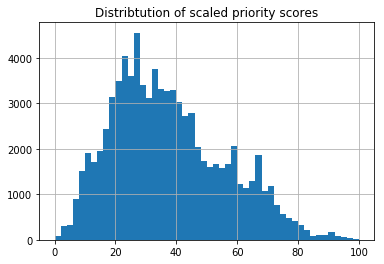

In [11]:
BASE_PRIORITY_MASTER = DECAY_PRIORITY_MASTER[baseCols].copy()  # Create base for weighting

# Apply weights to each column
for i in Rank_Cols: 
    col = i.replace("_Rank", "")
    weight = thresholds.loc[col]['W1_base']
    
    # Average the two methods and apply weights
    BASE_PRIORITY_MASTER[i] = DECAY_PRIORITY_MASTER[i]*weight
    
BASE_PRIORITY_MASTER['Weighted_Priority_mean'] = BASE_PRIORITY_MASTER[Rank_Cols].mean(axis=1)
BASE_PRIORITY_MASTER['Weighted_Priority_mean'] = MY_minmaxscaler_dfCol(BASE_PRIORITY_MASTER['Weighted_Priority_mean'], reverse=False)


# prepare the final to be able to determine if more than 50% of the OSDS units are in a Priority zone (average wont count NaN as 0)
BASE_PRIORITY_MASTER['In_2017_CP_zone'].fillna(False, inplace=True)

# Plots 
BASE_PRIORITY_MASTER['Weighted_Priority_mean'].hist(bins=50)
plt.title('Distribtution of scaled priority scores')

### Apply weights: Ecological Scenario

The Ecological scenario is a hypothetical example where we have arbitrarilly increased the weights of factors that relate to ecosystem health, or impacts from OSDS to non-human natural resources.

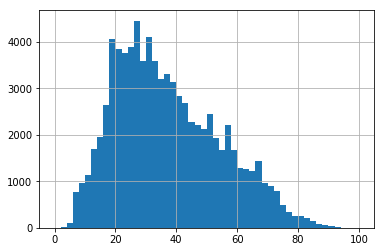

In [12]:
ECO_PRIORITY_MASTER = DECAY_PRIORITY_MASTER[baseCols].copy()  # Create base for mergeing

for i in Rank_Cols: 
    col = i.replace("_Rank", "")
    weight = thresholds.loc[col]['W2_eco']
    
    # apply weights
    ECO_PRIORITY_MASTER[i] = DECAY_PRIORITY_MASTER[i]*weight
    
ECO_PRIORITY_MASTER['Weighted_Priority_mean'] =  ECO_PRIORITY_MASTER[Rank_Cols].mean(axis=1)
ECO_PRIORITY_MASTER['Weighted_Priority_mean'] = MY_minmaxscaler_dfCol(ECO_PRIORITY_MASTER['Weighted_Priority_mean'], reverse=False)

# prepare the final to be able to determine if more than 50% of the OSDS units are in a Priority zone (average wont count NaN as 0)
ECO_PRIORITY_MASTER['In_2017_CP_zone'].fillna(False, inplace=True)

# Plots 
ECO_PRIORITY_MASTER['Weighted_Priority_mean'].hist(bins=50)

### Apply weights: Antrhopogenic Scenario

The Antrhopogenic scenario is a hypothetical example where we have arbitrarilly increased the weights of factors that relate to human health impacts, or factors that affect human's use and enjoyment of the environment.

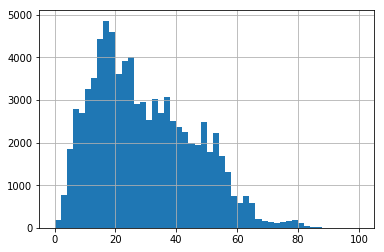

In [13]:
ANTHRO_PRIORITY_MASTER = DECAY_PRIORITY_MASTER[baseCols].copy()  # Create base for mergeing

for i in Rank_Cols: 
    col = i.replace("_Rank", "")
    weight = thresholds.loc[col]['W3_anthro']
    
    # Average the two methods and apply weights
    ANTHRO_PRIORITY_MASTER[i] = DECAY_PRIORITY_MASTER[i]*weight
    
ANTHRO_PRIORITY_MASTER['Weighted_Priority_mean'] =  ANTHRO_PRIORITY_MASTER[Rank_Cols].mean(axis=1)
ANTHRO_PRIORITY_MASTER['Weighted_Priority_mean'] = MY_minmaxscaler_dfCol(ANTHRO_PRIORITY_MASTER['Weighted_Priority_mean'], reverse=False)

# prepare the final to be able to determine if more than 50% of the OSDS units are in a Priority zone (average wont count NaN as 0)
ANTHRO_PRIORITY_MASTER['In_2017_CP_zone'].fillna(False, inplace=True)

# Plots 
ANTHRO_PRIORITY_MASTER['Weighted_Priority_mean'].hist(bins=50)

### Apply weights: Physical Drivers Only Scenario

The Physical Drivers Only scenario reflects only those drivers that are physically based and not value based, with the same weights as the base case scenario: 
these include: 
- dist2_coast_m
- dist2_Strm_Wtlnd_m
- dist2_MunWells_m
- dist2_DomWells_m
- WELLCZ
- Dep_to_Water_m
- OSDS_Density_perAcre
- SLR
- Soil_Suitability
- rainfall_in
- UserDays

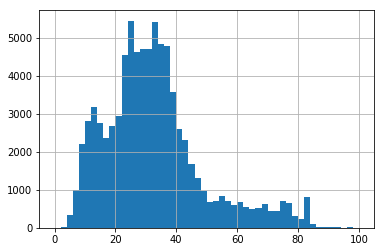

In [14]:
PHYSICAL_PRIORITY_MASTER = DECAY_PRIORITY_MASTER[baseCols].copy()  # Create base for mergeing

for i in Rank_Cols: 
    col = i.replace("_Rank", "")
    weight = thresholds.loc[col]['W4_Physical_drive']
    
    # Average the two methods and apply weights
    PHYSICAL_PRIORITY_MASTER[i] = DECAY_PRIORITY_MASTER[i]*weight
    
PHYSICAL_PRIORITY_MASTER['Weighted_Priority_mean'] =  PHYSICAL_PRIORITY_MASTER[Rank_Cols].mean(axis=1)
PHYSICAL_PRIORITY_MASTER['Weighted_Priority_mean'] = MY_minmaxscaler_dfCol(PHYSICAL_PRIORITY_MASTER['Weighted_Priority_mean'], reverse=False)

# prepare the final to be able to determine if more than 50% of the OSDS units are in a Priority zone (average wont count NaN as 0)
PHYSICAL_PRIORITY_MASTER['In_2017_CP_zone'].fillna(False, inplace=True)


# Plots 
PHYSICAL_PRIORITY_MASTER['Weighted_Priority_mean'].hist(bins=50)

### Apply weights: Value-based Drivers Only Scenario

The Value-based Drivers Only scenario reflects only those drivers that are value based and not physically based, with the same weights as the base case scenario: 
these include: 
- UserDays
- Coral_rank
- Fish
- Swim_beach

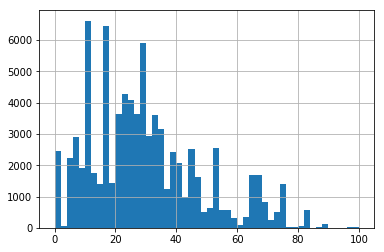

In [15]:
VALUE_PRIORITY_MASTER = DECAY_PRIORITY_MASTER[baseCols].copy()  # Create base for mergeing

for i in Rank_Cols: 
    col = i.replace("_Rank", "")
    weight = thresholds.loc[col]['W5_Value_drivers']
    
    # Average the two methods and apply weights
    VALUE_PRIORITY_MASTER[i] = DECAY_PRIORITY_MASTER[i]*weight
    
VALUE_PRIORITY_MASTER['Weighted_Priority_mean'] =  VALUE_PRIORITY_MASTER[Rank_Cols].mean(axis=1)
VALUE_PRIORITY_MASTER['Weighted_Priority_mean'] = MY_minmaxscaler_dfCol(VALUE_PRIORITY_MASTER['Weighted_Priority_mean'], reverse=False)

# prepare the final to be able to determine if more than 50% of the OSDS units are in a Priority zone (average wont count NaN as 0)
VALUE_PRIORITY_MASTER['In_2017_CP_zone'].fillna(False, inplace=True)

# Plots 
VALUE_PRIORITY_MASTER['Weighted_Priority_mean'].hist(bins=50)

# Exploring the difference between scenarios
Scatter plots of the priority score of each census unit. Each dot is a block/track/BkGrp and the stats show how different (r2 and MSRE) the overall regression between the two scenarios is. 

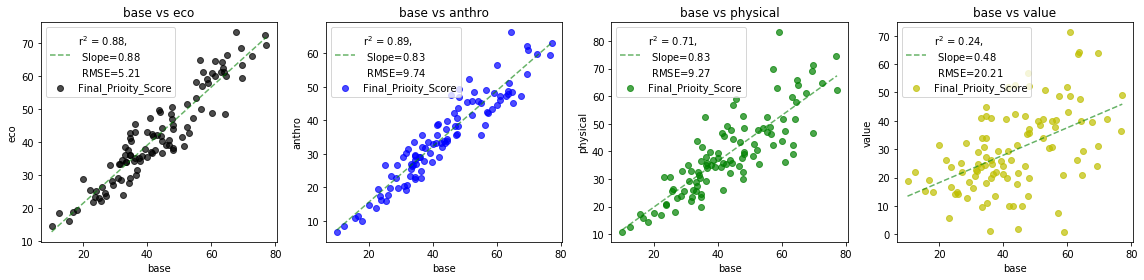

In [16]:
# create individual dataframes for each scenario based on trackss
UnitCol = 'Track_ID'
Tracks_priority_frame_base = group_by_census_unit(BASE_PRIORITY_MASTER, UnitCol, omit_less_than=25)
Tracks_priority_frame_eco = group_by_census_unit(ECO_PRIORITY_MASTER, UnitCol, omit_less_than=25)
Tracks_priority_frame_anthro = group_by_census_unit(ANTHRO_PRIORITY_MASTER, UnitCol, omit_less_than=25)
Tracks_priority_frame_physical = group_by_census_unit(PHYSICAL_PRIORITY_MASTER, UnitCol, omit_less_than=25)
Tracks_priority_frame_value = group_by_census_unit(VALUE_PRIORITY_MASTER, UnitCol, omit_less_than=25)


# Scatterplot comparisons for tracks 
fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(16, 4), sharex=True, sharey=True)

x = Tracks_priority_frame_base['Final_Prioity_Score']; y = Tracks_priority_frame_eco['Final_Prioity_Score']
crossplotEm(x, y, 1,4,1, "base", "eco", "base vs eco", c='k')

x = Tracks_priority_frame_base['Final_Prioity_Score']; y = Tracks_priority_frame_anthro['Final_Prioity_Score']
crossplotEm(x, y, 1,4,2, "base", "anthro", "base vs anthro", c='b')

x = Tracks_priority_frame_base['Final_Prioity_Score']; y = Tracks_priority_frame_physical['Final_Prioity_Score']
crossplotEm(x, y, 1,4,3, "base", "physical", "base vs physical", c='green')

x = Tracks_priority_frame_base['Final_Prioity_Score']; y = Tracks_priority_frame_value['Final_Prioity_Score']
crossplotEm(x, y, 1,4,4, "base", "value", "base vs value", c='y')

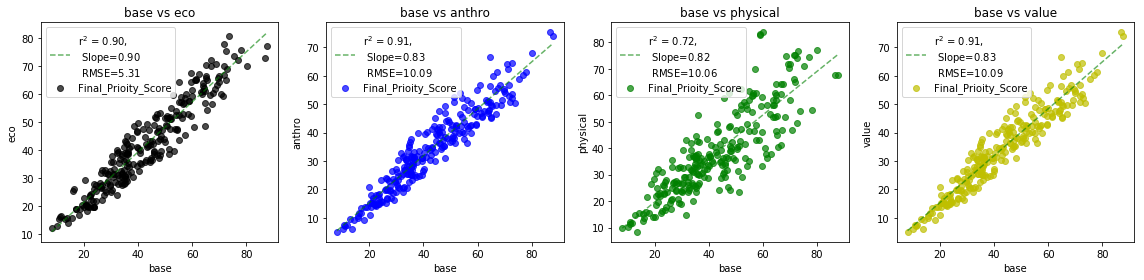

In [17]:
# create individual dataframes for each scenario based on blocks
UnitCol = 'BlockGp_ID'
BlockGp_priority_frame_base = group_by_census_unit(BASE_PRIORITY_MASTER, UnitCol, omit_less_than=20)
BlockGp_priority_frame_eco = group_by_census_unit(ECO_PRIORITY_MASTER, UnitCol, omit_less_than=20)
BlockGp_priority_frame_anthro = group_by_census_unit(ANTHRO_PRIORITY_MASTER, UnitCol, omit_less_than=20)
BlockGp_priority_frame_physical = group_by_census_unit(PHYSICAL_PRIORITY_MASTER, UnitCol, omit_less_than=20)
BlockGp_priority_frame_value = group_by_census_unit(VALUE_PRIORITY_MASTER, UnitCol, omit_less_than=20)

# Scatterplot comparisons 
fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(16, 4), sharex=True, sharey=True)

x = BlockGp_priority_frame_base['Final_Prioity_Score']; y = BlockGp_priority_frame_eco['Final_Prioity_Score']
crossplotEm(x, y, 1,4,1, "base", "eco", "base vs eco", c='k')

x = BlockGp_priority_frame_base['Final_Prioity_Score']; y = BlockGp_priority_frame_anthro['Final_Prioity_Score']
crossplotEm(x, y, 1,4,2, "base", "anthro", "base vs anthro", c='b')

x = BlockGp_priority_frame_base['Final_Prioity_Score']; y = BlockGp_priority_frame_physical['Final_Prioity_Score']
crossplotEm(x, y, 1,4,3, "base", "physical", "base vs physical", c='green')

x = BlockGp_priority_frame_base['Final_Prioity_Score']; y = BlockGp_priority_frame_anthro['Final_Prioity_Score']
crossplotEm(x, y, 1,4,4, "base", "value", "base vs value", c='y')

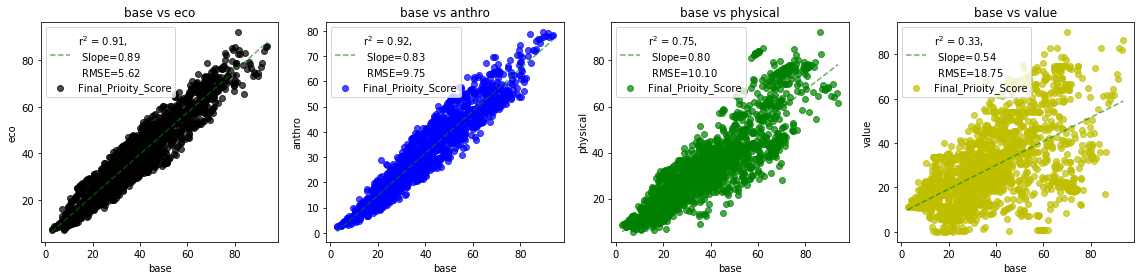

In [18]:
# create individual dataframes for each scenario based on Blocks
UnitCol = 'BlockBk_ID'
Block_priority_frame_base = group_by_census_unit(BASE_PRIORITY_MASTER, UnitCol, omit_less_than=10)
Block_priority_frame_eco = group_by_census_unit(ECO_PRIORITY_MASTER, UnitCol, omit_less_than=10)
Block_priority_frame_anthro = group_by_census_unit(ANTHRO_PRIORITY_MASTER, UnitCol, omit_less_than=10)
Block_priority_frame_physical = group_by_census_unit(PHYSICAL_PRIORITY_MASTER, UnitCol, omit_less_than=10)
Block_priority_frame_value = group_by_census_unit(VALUE_PRIORITY_MASTER, UnitCol, omit_less_than=10)


# Scatterplot comparisons
fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(16, 4), sharex=True, sharey=True)

x = Block_priority_frame_base['Final_Prioity_Score']; y = Block_priority_frame_eco['Final_Prioity_Score']
crossplotEm(x, y, 1,4,1, "base", "eco", "base vs eco", c='k')

x = Block_priority_frame_base['Final_Prioity_Score']; y = Block_priority_frame_anthro['Final_Prioity_Score']
crossplotEm(x, y, 1,4,2, "base", "anthro", "base vs anthro", c='b')

x = Block_priority_frame_base['Final_Prioity_Score']; y = Block_priority_frame_physical['Final_Prioity_Score']
crossplotEm(x, y, 1,4,3, "base", "physical", "base vs physical", c='green')

x = Block_priority_frame_base['Final_Prioity_Score']; y = Block_priority_frame_value['Final_Prioity_Score']
crossplotEm(x, y, 1,4,4, "base", "value", "base vs value", c='y')



In [19]:
# Create single dataframe for comparison

# Tracks
compare_priority_score_Track = pd.DataFrame(Tracks_priority_frame_base['Track_ID']).set_index('Track_ID')
compare_priority_score_Track["Base_Score"] = Tracks_priority_frame_base.set_index('Track_ID')['Final_Prioity_Score']
compare_priority_score_Track["Eco_Score"] = Tracks_priority_frame_eco.set_index('Track_ID')['Final_Prioity_Score']
compare_priority_score_Track["Anthro_Score"] = Tracks_priority_frame_anthro.set_index('Track_ID')['Final_Prioity_Score']
#compare_priority_score_Track["Physical_Score"] = Tracks_priority_frame_physical.set_index('Track_ID')['Final_Prioity_Score']
#compare_priority_score_Track["Value_Score"] = Tracks_priority_frame_value.set_index('Track_ID')['Final_Prioity_Score']
compare_priority_score_Track = compare_priority_score_Track.sort_values("Base_Score")

compare_priority_rank_Track = pd.DataFrame(Tracks_priority_frame_base['Track_ID']).set_index('Track_ID')
compare_priority_rank_Track["Base_Rank"] = Tracks_priority_frame_base.set_index('Track_ID')['Final_Prioity_Rank']
compare_priority_rank_Track["Eco_Rank"] = Tracks_priority_frame_eco.set_index('Track_ID')['Final_Prioity_Rank']
compare_priority_rank_Track["Anthro_Rank"] = Tracks_priority_frame_anthro.set_index('Track_ID')['Final_Prioity_Rank']
#compare_priority_rank_Track["Physical_Rank"] = Tracks_priority_frame_physical.set_index('Track_ID')['Final_Prioity_Rank']
#compare_priority_rank_Track["Value_Rank"] = Tracks_priority_frame_value.set_index('Track_ID')['Final_Prioity_Rank']
compare_priority_rank_Track = compare_priority_rank_Track.sort_values("Base_Rank")



# BlockGroups
compare_priority_score_BkGrp = pd.DataFrame(BlockGp_priority_frame_base['BlockGp_ID']).set_index('BlockGp_ID')
compare_priority_score_BkGrp["Base_Score"] = BlockGp_priority_frame_base.set_index('BlockGp_ID')['Final_Prioity_Score']
compare_priority_score_BkGrp["Eco_Score"] = BlockGp_priority_frame_eco.set_index('BlockGp_ID')['Final_Prioity_Score']
compare_priority_score_BkGrp["Anthro_Score"] = BlockGp_priority_frame_anthro.set_index('BlockGp_ID')['Final_Prioity_Score']
#compare_priority_score_BkGrp["Physical_Score"] = BlockGp_priority_frame_physical.set_index('BlockGp_ID')['Final_Prioity_Score']
#compare_priority_score_BkGrp["Value_Score"] = BlockGp_priority_frame_value.set_index('BlockGp_ID')['Final_Prioity_Score']
compare_priority_score_BkGrp = compare_priority_score_BkGrp.sort_values("Base_Score")

compare_priority_rank_BkGrp = pd.DataFrame(BlockGp_priority_frame_base['BlockGp_ID']).set_index('BlockGp_ID')
compare_priority_rank_BkGrp["Base_Rank"] = BlockGp_priority_frame_base.set_index('BlockGp_ID')['Final_Prioity_Rank']
compare_priority_rank_BkGrp["Eco_Rank"] = BlockGp_priority_frame_eco.set_index('BlockGp_ID')['Final_Prioity_Rank']
#compare_priority_rank_BkGrp["Anthro_Rank"] = BlockGp_priority_frame_anthro.set_index('BlockGp_ID')['Final_Prioity_Rank']
#compare_priority_rank_BkGrp["Physical_Rank"] = BlockGp_priority_frame_physical.set_index('BlockGp_ID')['Final_Prioity_Rank']
compare_priority_rank_BkGrp["Value_Rank"] = BlockGp_priority_frame_value.set_index('BlockGp_ID')['Final_Prioity_Rank']

compare_priority_rank_BkGrp = compare_priority_rank_BkGrp.sort_values("Base_Rank")



# Add in the OSDS count to tracks for the labels on heatmap 
compare_priority_score_Track["OSDS_count"] = Tracks_priority_frame_base.set_index('Track_ID')['OSDS_count']
compare_priority_rank_Track["OSDS_count"] = Tracks_priority_frame_base.set_index('Track_ID')['OSDS_count']

### Plot heatmaps to compare the differences in scenarios for each track or blockgroup
not doing blocks because there are too many 

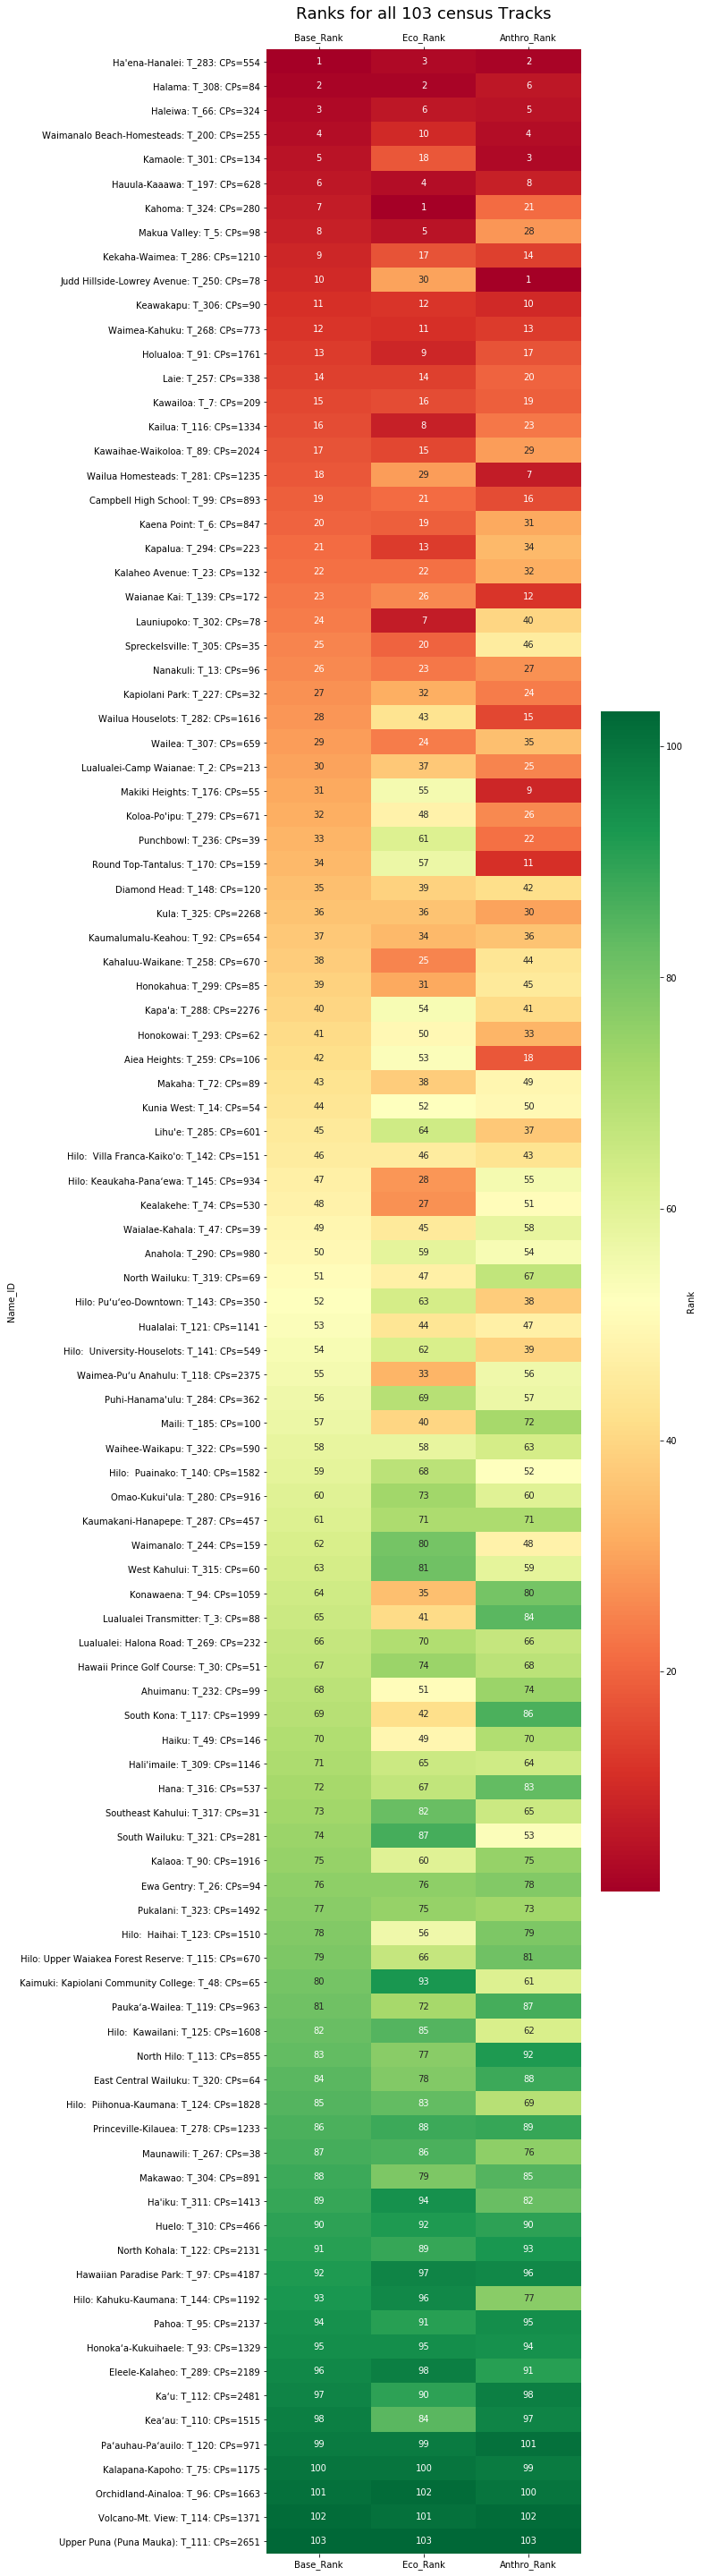

In [21]:
# Plot for Tracks  (Note if Y labels are nan (or error) run the cell above again)

############  Note hackjob visualization to see which of the priority tracks are within the old priority zones, remove ############ lines to revert

# Get track names, just for this plot
path = os.path.join("..", "Projected_data/Census/With_2017_priority", '2010_Census_Tracts_Meta_w2017.shp')  ############  Changed Shp location
columns_nams = [field.name for field in arcpy.ListFields(path)]     # List of all col names
columns_nams.pop(1)  # remove stupid shape col                           # THe "Shape" col will make numpy array to pandas puke
temparr = arcpy.da.FeatureClassToNumPyArray(path, columns_nams)     # convert to numpy recarray
Track_meta = pd.DataFrame(temparr)        
Track_meta['Name_ID'] = Track_meta['name']+": T_"+Track_meta['Track_ID'].map(str)
#Track_meta = Track_meta[['Name_ID', 'Track_ID', 'In2017Zone']]   ############  Added 'In2017Zone'
Track_meta = Track_meta.set_index('Track_ID')
compare_priority_rank_Track["Name_ID"] = Track_meta['Name_ID']
compare_priority_rank_Track['Name_ID'] = compare_priority_rank_Track['Name_ID']+": CPs="+compare_priority_rank_Track['OSDS_count'].astype(str)
# compare_priority_rank_Track["In2017Zone"] = Track_meta['In2017Zone']   ############  Added this line
compare_priority_rank_Track = compare_priority_rank_Track.set_index('Name_ID')                                  # Convert to pandas bliss
del compare_priority_rank_Track['OSDS_count']


fig, ax = plt.subplots(figsize=(11, 40))
total_num = len(compare_priority_rank_Track)
plt.title("Ranks for all {} census Tracks".format(total_num), fontsize=18, y=1.01)
plt.tick_params(axis='x', which='major', labelsize=10, labelbottom = True, bottom=True, top = True, labeltop=True)
g= sns.heatmap(compare_priority_rank_Track, annot=True,  cmap = 'RdYlGn', fmt='g', cbar_kws={'label': 'Rank'})

plt.tight_layout()
plt.savefig(os.path.join(".", "Outputs/Figures", "Rank_heatmap_Tracks_Sens_Test.pdf"))
plt.savefig(os.path.join(".", "Outputs/Figures", "Rank_heatmap_Tracks_Sens_Test.png"))


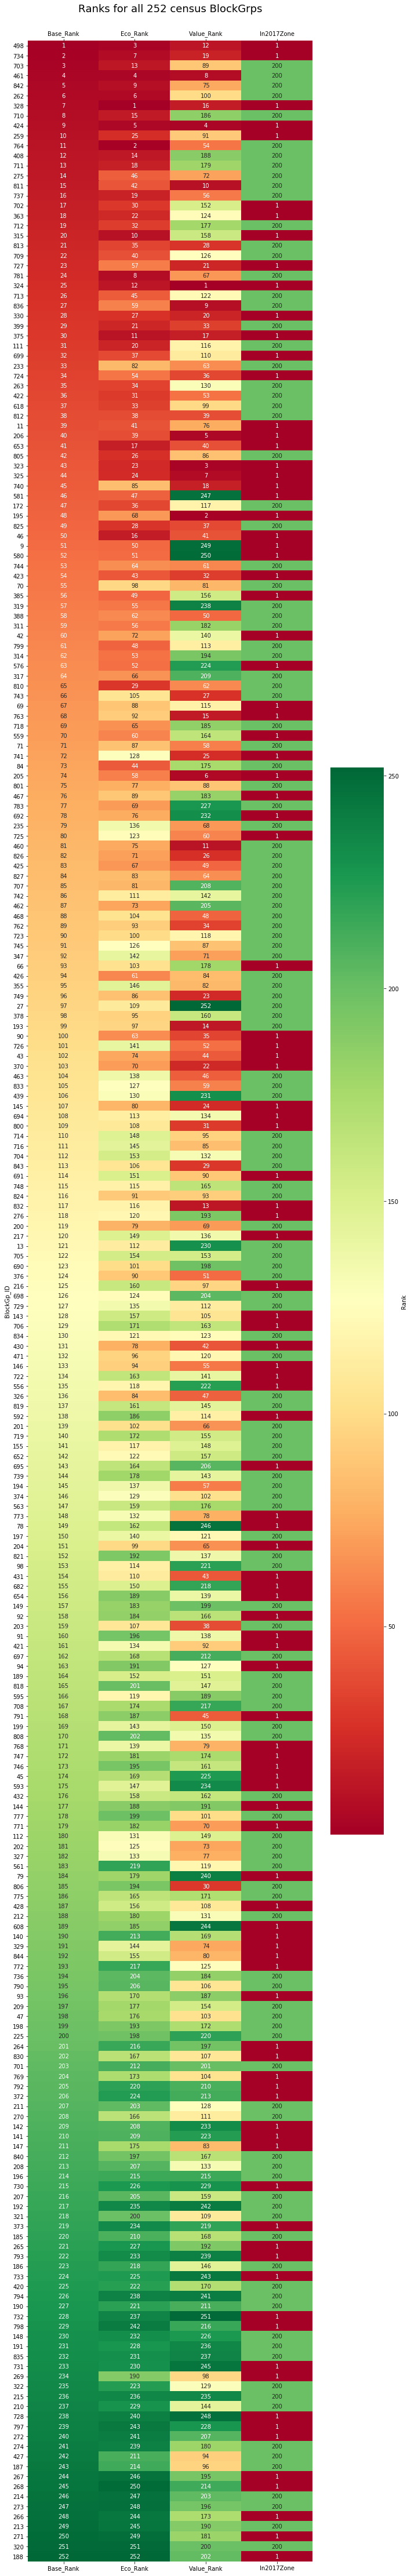

In [22]:
# Plot for blockGroups

############  Note hackjob visualization to see which of the priority tracks are within the old priority zones, remove ############ lines to revert
############ just for this plot
path = os.path.join("..", "Projected_data/Census/With_2017_priority", '2010_Census_Block_Groups_Meta_w2017.shp')  ############  Changed Shp location
columns_nams = [field.name for field in arcpy.ListFields(path)]     # List of all col names
columns_nams.pop(1)  # remove stupid shape col                           # THe "Shape" col will make numpy array to pandas puke
temparr = arcpy.da.FeatureClassToNumPyArray(path, columns_nams)     # convert to numpy recarray
Track_meta = pd.DataFrame(temparr)        
Track_meta = Track_meta[['BlockGp_ID', 'In2017Zone']]   ############  Added 'In2017Zone'
Track_meta = Track_meta.set_index('BlockGp_ID')
compare_priority_rank_BkGrp["In2017Zone"] = Track_meta['In2017Zone']   ############  Added this line


fig, ax = plt.subplots(figsize=(11, 80))
total_num = len(compare_priority_rank_BkGrp)
plt.title("Ranks for all {} census BlockGrps".format(total_num), fontsize=18, y=1.01)
plt.tick_params(axis='both', which='major', labelsize=10, labelbottom = True, bottom=True, top = True, labeltop=True)
g= sns.heatmap(compare_priority_rank_BkGrp, annot=True,  cmap = 'RdYlGn', fmt='g', cbar_kws={'label': 'Rank'})

plt.savefig("Rank_heatmap_Block_groups_2017_priority.pdf")

## Calculate stats about how the three scenarios differ
some notes about these numbers
- The deviation from one scenario to another is simply the difference in the statewide rank of any given block/track/BkGrp between one of the weighting scenarios to another. 
- it can be calculated as an absolute difference or with a sign
- The mean of the absolute deviations tells us, on average how different of a rank can one expect to see between any two scenarios, The mean of the non-absolute deviations is meaningless
- The std of the non-absolute deviations is probably the best reportable estimate of variation between the scenarios, thus if you wanted to tell someone what the rank of a give block/track/BkGrp is you could, within the current parameters of this exersize say the rank is any of the three scenario ranks, +or- the standard deviation of the non-abs deviation 

In [26]:
compare_priority_rank_Track_stats =compare_priority_rank_Track.copy()
compare_priority_rank_Track_stats['eco_dev_frm_Base'] = (compare_priority_rank_Track_stats['Base_Rank'] - compare_priority_rank_Track_stats['Eco_Rank'])
compare_priority_rank_Track_stats['eco_dev_frm_Base_abs'] = abs(compare_priority_rank_Track_stats['Base_Rank'] - compare_priority_rank_Track_stats['Eco_Rank'])

compare_priority_rank_Track_stats['anthro_dev_frm_Base'] = (compare_priority_rank_Track_stats['Base_Rank'] - compare_priority_rank_Track_stats['Anthro_Rank'])
compare_priority_rank_Track_stats['anthro_dev_frm_Base_abs'] = abs(compare_priority_rank_Track_stats['Base_Rank'] - compare_priority_rank_Track_stats['Anthro_Rank'])

#compare_priority_rank_Track_stats['physical_dev_frm_Base'] = (compare_priority_rank_Track_stats['Base_Rank'] - compare_priority_rank_Track_stats['Physical_Rank'])
#compare_priority_rank_Track_stats['physical_dev_frm_Base_abs'] = abs(compare_priority_rank_Track_stats['Base_Rank'] - compare_priority_rank_Track_stats['Physical_Rank'])

#compare_priority_rank_Track_stats['value_dev_frm_Base'] = (compare_priority_rank_Track_stats['Base_Rank'] - compare_priority_rank_Track_stats['Value_Rank'])
#compare_priority_rank_Track_stats['value_dev_frm_Base_abs'] = abs(compare_priority_rank_Track_stats['Base_Rank'] - compare_priority_rank_Track_stats['Value_Rank'])


coltouse = ['eco_dev_frm_Base', 'eco_dev_frm_Base_abs', 'anthro_dev_frm_Base', 'anthro_dev_frm_Base_abs'] # 'physical_dev_frm_Base', 'physical_dev_frm_Base_abs', 'value_dev_frm_Base', 'value_dev_frm_Base_abs']
compare_priority_rank_Track_stats = compare_priority_rank_Track_stats[coltouse]
compare_priority_rank_Track_stats.describe()

,eco_dev_frm_Base,eco_dev_frm_Base_abs,anthro_dev_frm_Base,anthro_dev_frm_Base_abs
count,103.000000,103.000000,103.000000,103.000000
mean,0.000000,8.368932,0.000000,7.203883
std,11.253758,7.478060,9.637549,6.362203
min,-28.000000,0.000000,-21.000000,0.000000
25%,-7.500000,2.000000,-6.000000,2.000000
50%,0.000000,6.000000,-1.000000,6.000000
75%,5.500000,13.000000,5.500000,11.000000
max,29.000000,29.000000,24.000000,24.000000


In [25]:
compare_priority_rank_BkGrp_stats =compare_priority_rank_Track.copy()
compare_priority_rank_BkGrp_stats['eco_dev_frm_Base'] = (compare_priority_rank_BkGrp_stats['Base_Rank'] - compare_priority_rank_BkGrp_stats['Eco_Rank'])
compare_priority_rank_BkGrp_stats['eco_dev_frm_Base_abs'] = abs(compare_priority_rank_BkGrp_stats['Base_Rank'] - compare_priority_rank_BkGrp_stats['Eco_Rank'])

compare_priority_rank_BkGrp_stats['anthro_dev_frm_Base'] = (compare_priority_rank_BkGrp_stats['Base_Rank'] - compare_priority_rank_BkGrp_stats['Anthro_Rank'])
compare_priority_rank_BkGrp_stats['anthro_dev_frm_Base_abs'] = abs(compare_priority_rank_BkGrp_stats['Base_Rank'] - compare_priority_rank_BkGrp_stats['Anthro_Rank'])


#compare_priority_rank_BkGrp_stats['physical_dev_frm_Base'] = (compare_priority_rank_BkGrp_stats['Base_Rank'] - compare_priority_rank_BkGrp_stats['Physical_Rank'])
#compare_priority_rank_BkGrp_stats['physical_dev_frm_Base_abs'] = abs(compare_priority_rank_BkGrp_stats['Base_Rank'] - compare_priority_rank_BkGrp_stats['Physical_Rank'])

#compare_priority_rank_BkGrp_stats['value_dev_frm_Base'] = (compare_priority_rank_BkGrp_stats['Base_Rank'] - compare_priority_rank_BkGrp_stats['Value_Rank'])
#compare_priority_rank_BkGrp_stats['value_dev_frm_Base_abs'] = abs(compare_priority_rank_BkGrp_stats['Base_Rank'] - compare_priority_rank_BkGrp_stats['Value_Rank'])


coltouse = ['eco_dev_frm_Base', 'eco_dev_frm_Base_abs', 'anthro_dev_frm_Base', 'anthro_dev_frm_Base_abs'] #,'physical_dev_frm_Base', 'physical_dev_frm_Base_abs', 'value_dev_frm_Base', 'value_dev_frm_Base_abs']
compare_priority_rank_BkGrp_stats = compare_priority_rank_BkGrp_stats[coltouse]
compare_priority_rank_BkGrp_stats.describe()

,eco_dev_frm_Base,eco_dev_frm_Base_abs,anthro_dev_frm_Base,anthro_dev_frm_Base_abs
count,103.000000,103.000000,103.000000,103.000000
mean,0.000000,8.368932,0.000000,7.203883
std,11.253758,7.478060,9.637549,6.362203
min,-28.000000,0.000000,-21.000000,0.000000
25%,-7.500000,2.000000,-6.000000,2.000000
50%,0.000000,6.000000,-1.000000,6.000000
75%,5.500000,13.000000,5.500000,11.000000
max,29.000000,29.000000,24.000000,24.000000
